<a href="https://colab.research.google.com/github/IshaIndhu/FlowerImage-Classification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_dir = "/content/drive/MyDrive/PROJECT_2/PROJECT_2/train/"
val_dir = "/content/drive/MyDrive/PROJECT_2/PROJECT_2/val/"

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folders = glob('/content/drive/MyDrive/PROJECT_2/PROJECT_2/train/*')

In [ ]:
x = Flatten()(vgg.output)
# # x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
#!unzip "/content/drive/My Drive/PROJECT_2.zip" -d "/content/drive/My Drive/"

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(val_dir,  batch_size = 32, target_size = (224, 224))


Found 12753 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


In [ ]:
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
399/399 [==============================] - 3325s 8s/step - loss: 3.4899 - accuracy: 0.3216 - val_loss: 2.4864 - val_accuracy: 0.4763
Epoch 2/5
399/399 [==============================] - 230s 577ms/step - loss: 2.6218 - accuracy: 0.4653 - val_loss: 2.2774 - val_accuracy: 0.5517
Epoch 3/5
399/399 [==============================] - 232s 580ms/step - loss: 2.3644 - accuracy: 0.5200 - val_loss: 2.2765 - val_accuracy: 0.5679
Epoch 4/5
399/399 [==============================] - 231s 580ms/step - loss: 2.2619 - accuracy: 0.5455 - val_loss: 2.3764 - val_accuracy: 0.5663
Epoch 5/5
399/399 [==============================] - 231s 578ms/step - loss: 2.1607 - accuracy: 0.5639 - val_loss: 2.5294 - val_accuracy: 0.5892


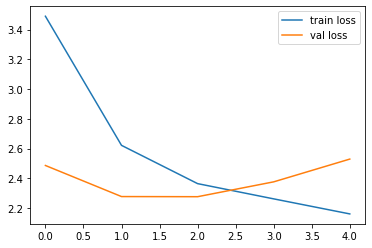

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

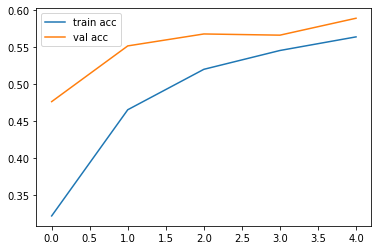

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('DL2_new_model.h5')